In [1]:
import time
from pytrends.request import TrendReq
from matplotlib import pyplot as plt
from tqdm import tqdm

In [257]:
# Vizu settings
%matplotlib inline
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (12, 6)

In [258]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [259]:
"""
Interest Over Time: This method will return historical data of the searched keyword from Google Trend according to the timeframe you have specified in the ‘build_payload’ method.
Historical Hourly Interest: To get the hourly interest of the keyword, you can use the get_historical_interset() method to fetch hourly data according to the time you have specified.

Interest By Region: The method intrest_by_region from pytrends can show you which countries search the keyword you selected on a scale of 0 to 100, where 100 represents a country with the most search and 0 represents a country that does not have enough data.

Related Topics: Pytrends can find words that are closely tied to a primary keyword of your choice and then return a list of related keywords on Google Trends.

Related Queries: Will return related searches that correspond to your topic/keyword.

Trending Searches: Will return trending searches in real-time for the geographical location.

Suggestions: Google Trends can give you a list of keyword suggestions related to your primary keyword.

""";

In [260]:
LANGUAGE = 'en-US'
TIME_ZONE = 360

In [261]:
pytrends = TrendReq(hl=LANGUAGE, tz=TIME_ZONE)

In [262]:
def load_countries(filename):
    countries = []
    with open(filename, "r") as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            line_list = line.split(",")
            code = line_list[0]
            country = line_list[1]
            countries.append((code, country))
    return countries

In [263]:
countries = load_countries("countries.txt")
print("Loaded {} countries".format(len(countries)))

Loaded 250 countries


In [264]:
def get_trends(kw_list: list, tf: str, geo: str, sleep: float = 0.5):
    time.sleep(sleep)
    pytrends.build_payload(kw_list, timeframe=tf, geo=geo)
    return pytrends.interest_over_time().drop(columns=['isPartial'])

In [265]:
# Query params
search_term = ["fishing"]
time_period = "today 5-y"

# Get data
search_history = []


# Testing with a 10 random countries
tmp_countries = countries[100:110]

for geocode, country in tqdm(tmp_countries):
    try:
        d = get_trends(search_term, time_period, geocode)
        search_history.append((d, country))
    except Exception as err:
        print("Exception on {}".format(country))

100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


In [266]:
# Show a few results
results = search_history[0:5]

Text(0.5, 1.0, 'Fishing: Interest Over Time')

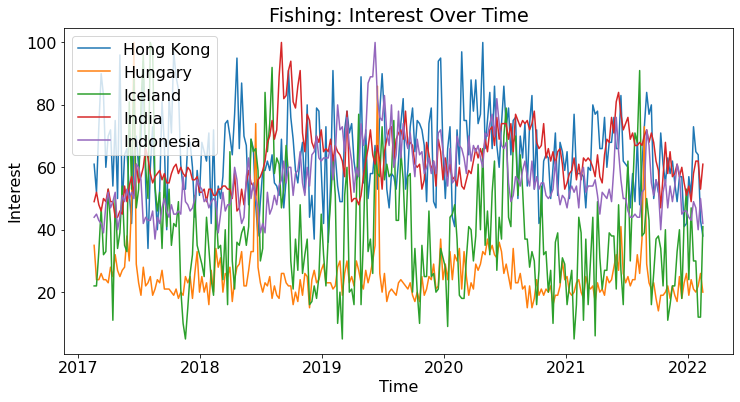

In [267]:
plt.figure()
for data, label in results:
    plt.plot(data, label=label)
plt.ylabel("Interest")
plt.xlabel("Time")
plt.legend()
plt.title("Fishing: Interest Over Time")